# Raport

Podczas tego projektu zajmowaliśmy się problemem klasteryzacji danych dotyczących ksiąg religijnych. Dane są dostępne pod adresem:https://archive.ics.uci.edu/ml/datasets/A+study+of++Asian+Religious+and+Biblical+Texts . Nasz zbiór skłądał się z  590 wierszy i 8266 kolumn. Każdy wiersz odpowiadał jednemu rozdziałowi jeden z ksiąg, a kolumny odpowiadały słowom wybranym przez autorów zbioru. W każdej komórce znajdowała się liczba całkowita odpowiadająca liczbie wystąpień danego słowa.

## EDA
Pierwszym etapem projektu było EDA, w którym przyjrzeliśmy się bliżej informacjom zawartym w danych.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display
import nltk
import warnings 
warnings.filterwarnings("ignore")
allBooks = pd.read_csv("AllBooks_baseline_DTM_Unlabelled.csv").rename(columns={'# foolishness': 'foolishness'})
allBooks.head()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zdecydowaliśmy się zaprezentować nasze dane w postaci chmury słów. Na takim wykresie wielkość słówa określona jest przez liczbę wystąpień w zbiorze.

In [3]:
def word_cloud(x):
    if x == -1:
        x1 = allBooks.mean().sort_values(ascending = False).rename_axis('words').reset_index(name='counts')
    else:
        x1 = allBooks.loc[x].sort_values(ascending = False).rename_axis('words').reset_index(name='counts')
    d = {}
    for a, i in x1.values:
        d[a] = i

    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    wordcloud = WordCloud(background_color="white")
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

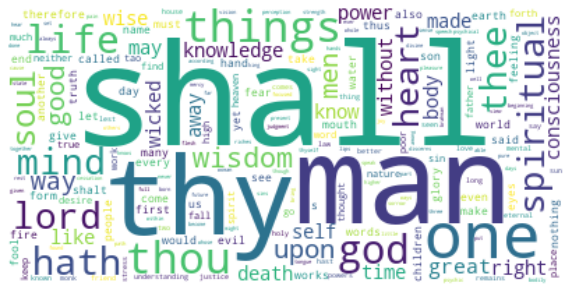

In [4]:
word_cloud(-1)

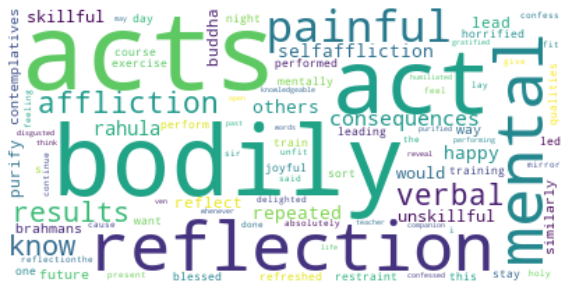

In [5]:
word_cloud(0)

Powyższe wizualiazje dotyczą: pierwsza wszystkich wierszy w zbiorze, druga tylko pierwszego wiersza.

Chmury słów oprócz wizualnego przedstawienia danych, pomogły nam zauważyć problem z występowaniem tych samych słów w różnych formach. Dlatego w kolejnym etapie czyli preprocessingu skorzystaliśmy z lematyzacji aby ujednolicić formy słów i jednocześnie doprowadzić do zmniejszenia wymiarów.

## Preprocessing

W tym kroku zajęliśmy się czyszczeniem naszej ramki danych i przygotowaniem jej do późniejszego modelowania.

Kroki które podjeliśmy w celu zmniejszenia wymiarowości danych to: usunięcie stop words i stemming. Stop wordy są najpopularniejsze słowa takie jak 'and', 'the', 'a',które nie są istotne do analizy,a  które mogą zaburzyć modelowanie wprowadzając niepotrzebny szum do danych. W kolejnym kroku wykorzystaliśmy stemming czyli odcięcie przedrostków i przyrostków tak aby pozostawić rdzeń słowa i zgrupować wyrazy z jednej rodziny.



## Modelowanie

W tym kroku postanowiliśmy stworzyć dwa modele klasteryzacji: KMeans oraz AgglomerativeClustering

Klastry dobieraliśmy na podstawie wyników z miar silhouette oraz Calińskiego-Harabasza. Następnie stworzyliśmy wizualizacji przy pomocy metody tSNE (z braku alternatywy).

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

In [5]:
pip install yellowbrick

     |████████████████████████████████| 271 kB 13.6 MB/s 
You should consider upgrading via the '/opt/python/envs/default/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


def silhouette(df, i):
    if i == 1:
        model = KMeans(random_state= 0)
    elif i == 2:
        model = Birch(threshold=5)
    elif i == 3: 
        model = AgglomerativeClustering() 
    cluster_num_seq = range(2, 10)  
    scores = []
    for k in cluster_num_seq:
        model.n_clusters = k
        labels = model.fit_predict(df)
        score = silhouette_score(df, labels)
        scores.append(score)

    plt.plot(cluster_num_seq, scores, 'go-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette plot')
    plt.show()



def calinski_harabasz(df, i):
    if i == 1:
        visualizer = KElbowVisualizer(
        KMeans(random_state= 0), k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    elif i == 2:
        visualizer = KElbowVisualizer(
        Birch(threshold=5), k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    elif i == 3:
        visualizer = KElbowVisualizer(
        AgglomerativeClustering() , k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    else: return 
    visualizer.fit(df)       
    visualizer.show()
    

In [7]:
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

def tSNE_function(df, n, i):
    random_state = 10
    tSNE = TSNE(random_state=random_state, verbose=0)
    books_proj = tSNE.fit_transform(df)
    mod = KMeans(n_clusters=n)
    if i == 2:
        mod = Birch(threshold=5, n_clusters=n)
    if i == 3:
        mod = AgglomerativeClustering(n_clusters=n)
    y = mod.fit_predict(df)

    scatter(books_proj, y)
    plt.show()

### Model dla początkowej ramki danych

### KMeans

Metoda należacą do grupy algorytmów analizy skupień tj. analizy polegającej na szukaniu i wyodrębnianiu grup obiektów podobnych (skupień) . Reprezentuje ona grupę algorytmów niehierarchicznych. Główną różnicą pomiędzy niehierarchicznymi i hierarchicznymi algorytmami jest konieczność wcześniejszego podania ilości skupień.

#### Miara jakości klasteryzacji

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


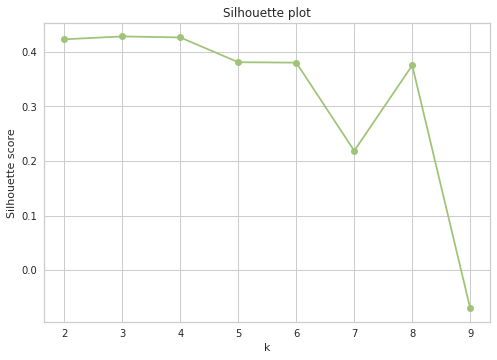

In [8]:
silhouette(allBooks, 1)

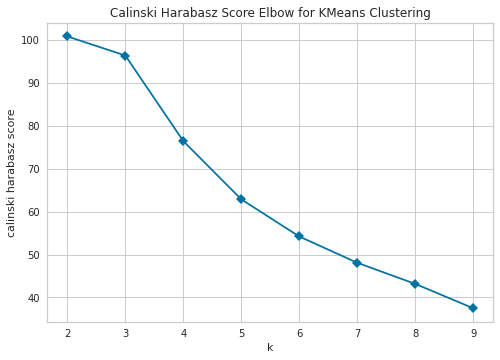

In [9]:
calinski_harabasz(allBooks, 1)

Z miar możemy wywnioskować, że jako optymalną liczbę klastrów należałoby wybrać 2 lub 3 klastry. Narysujmy więc przy pomocy metody tSNE klasteryzacje dla odpowiednio dwóch, trzech oraz ośmiu klastrów

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


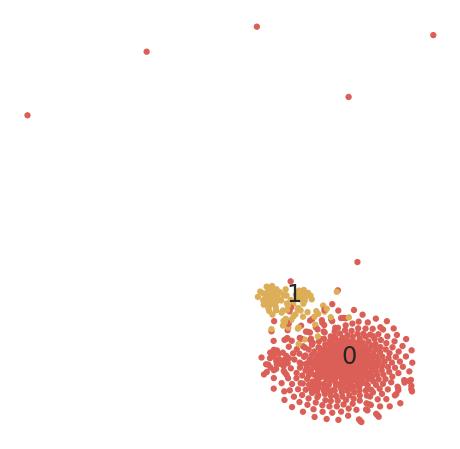

In [10]:
tSNE_function(allBooks, 2, 1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


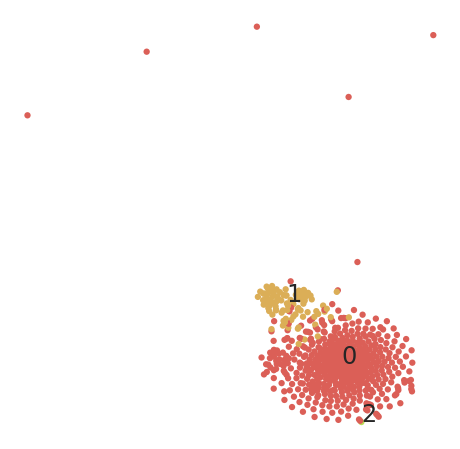

In [11]:
tSNE_function(allBooks, 3, 1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


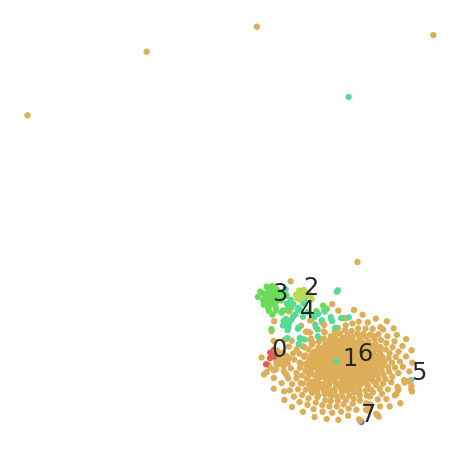

In [12]:
tSNE_function(allBooks, 8, 1)

### AgglomerativeClustering

Przykład modelu należący do metod aglomeracyjnych. Każda obserwacja tworzy na początku jednoelementowy klaster. Następnie pary klastrów są scalane, w każdej iteracji algorytmu łączone są ze sobą dwa najbardziej zbliżone klastry. Tworzone są tzw. „aglomeracje”. W tym typie podczas tworzenia klastrów, poruszamy się w górę hierarchii.

#### Miara jakości klasteryzacji

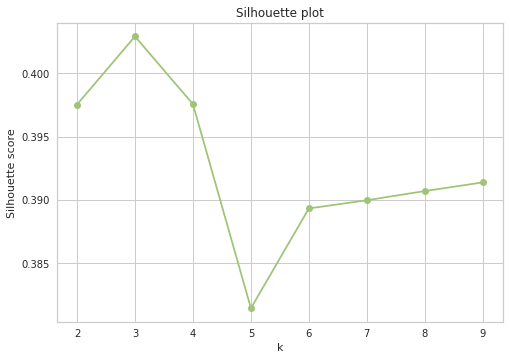

In [13]:
silhouette(allBooks, 3)

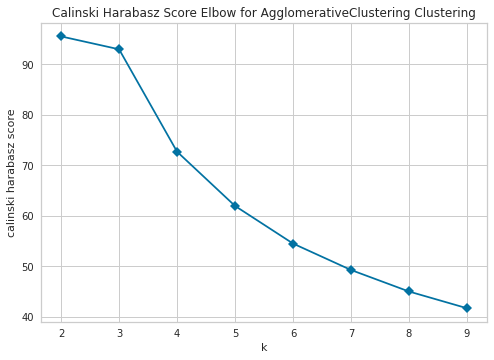

In [14]:
calinski_harabasz(allBooks, 3)

Z miar możemy wywnioskować, że jako optymalną liczbę klastrów należałoby wybrać 2 lub 3 klastry. Narysujmy więc przy pomocy metody tSNE klasteryzacje dla odpowiednio dwóch, trzech oraz ośmiu klastrów

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


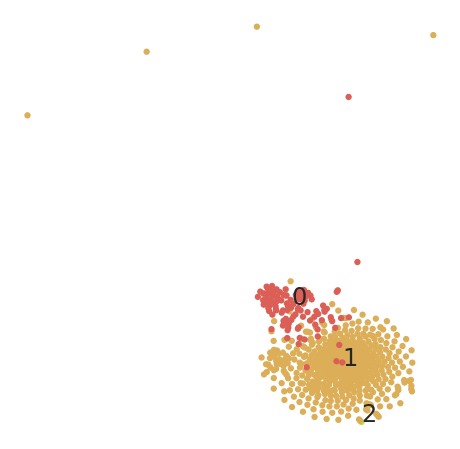

In [15]:
tSNE_function(allBooks, 3, 3)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


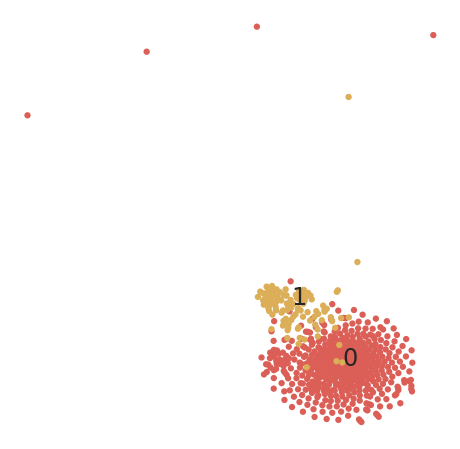

In [16]:
tSNE_function(allBooks, 2, 3)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


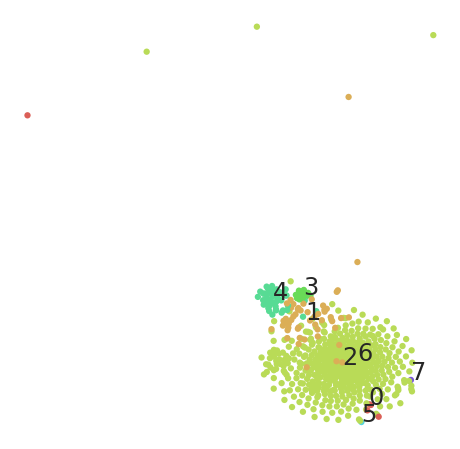

In [17]:
tSNE_function(allBooks, 8, 3)

## Alternatywna ramka danych

Jednak nawet po takim preprocessingu nasza ramka była bardzo duża a wstępne wyniki modeli nie były zbyt dobre, dlatego postanowiliśmy stworzyć też alternatywną ramkę danych, która będzie zawierała kluczowe zebrane przez nas informacje. Ramka ta zawiera :
- liczbę wyrazów w każdym rozdziale
- liczbę liter w każdym rozdziale
- liczbę wyrazów z podziałem na części mowy 
- oraz polaryzję, czyli liczbę z zakresu <-1,1>, która określa czy tekst jest pozytywny czy negatywny.(-1 oznacza skrajnie negatywny, 1 skrajnie pozytywny). Polaryzacja została zrobiona na dołączonym pełnym tekście rozdziałów, ponieważ badanie tylko pojedynczych słów nie przyniosłoby oczekiwanych rezultatów.

Na tak stworzonej ramce przetestowaliśmy kilka modeli.

In [18]:
alternative = pd.read_csv("alternative.csv")
alternative.head()

,JJ,NN,NNS,VBP,VBN,VBD,RB,VBG,RBR,VB,...,EX,WDT,FW,WRB,WP$,UH,NNP,Number_of_words,Number_of_letters,Polarity
0,9.0,9.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298.0,1949.0,-0.059836
1,8.0,12.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,700.0,0.117647
2,29.0,6.0,1.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188.0,1177.0,0.180979
3,13.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,859.0,0.343080
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,130.0,0.000000


### Model w przypadku alternatywnej ramki

#### KMeans

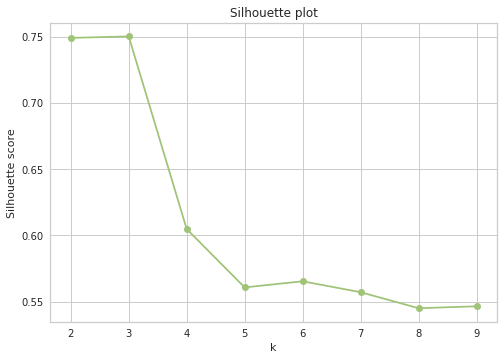

In [20]:
silhouette(alternative,1)

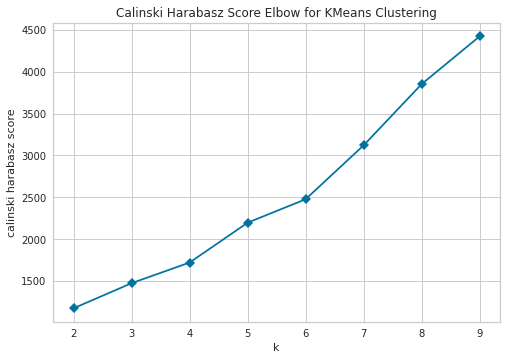

In [21]:
calinski_harabasz(alternative,1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


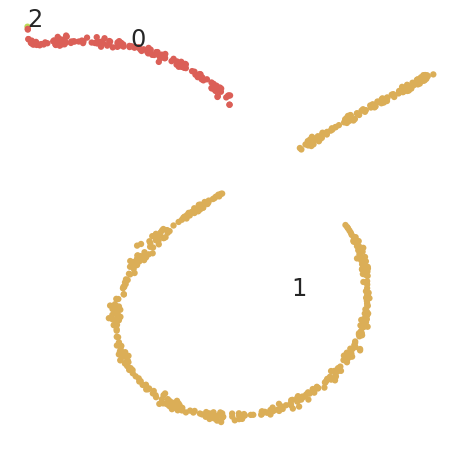

In [22]:
tSNE_function(alternative,3,1)

posx and posy should be finite values
posx and posy should be finite values


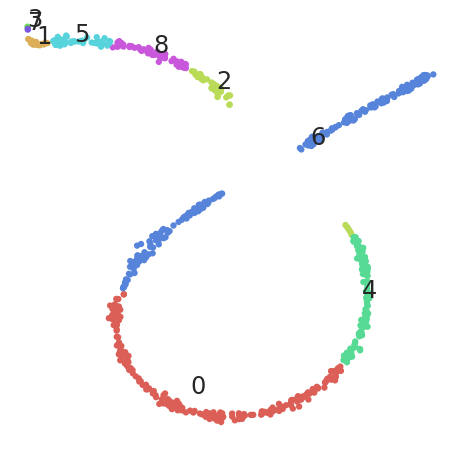

In [23]:
tSNE_function(alternative,9,1);

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


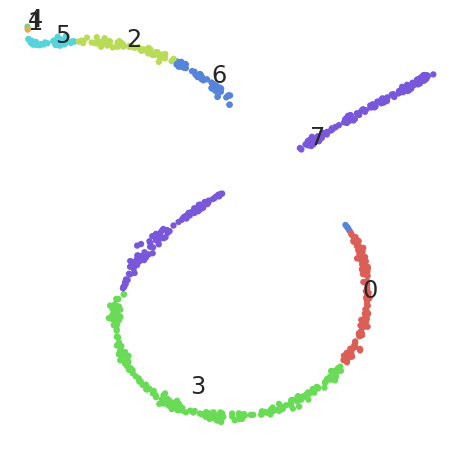

In [24]:
tSNE_function(alternative,8,1)

#### AgglomerativeClustering

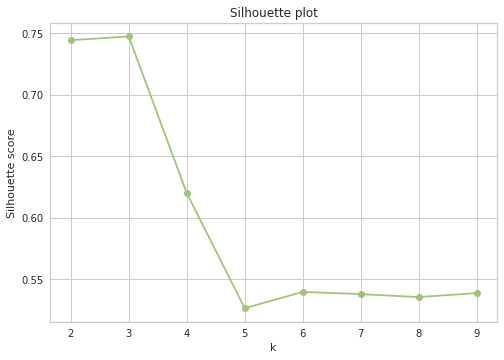

In [25]:
silhouette(alternative,3)

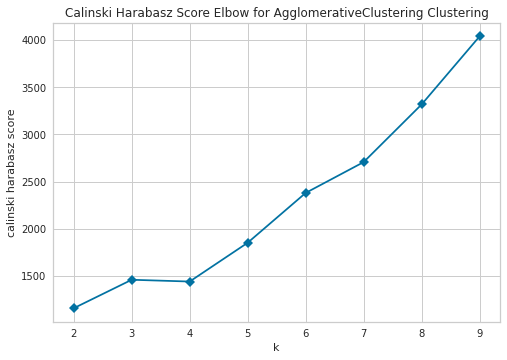

In [26]:
calinski_harabasz(alternative,3)

Metoda silhouette wskazała, że optymalną liczbą klastrów, w przypadku metody AgglomerativeClustering, będą 3 klastry, natomiast metoda Calińskiego-Harabasza: 9

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


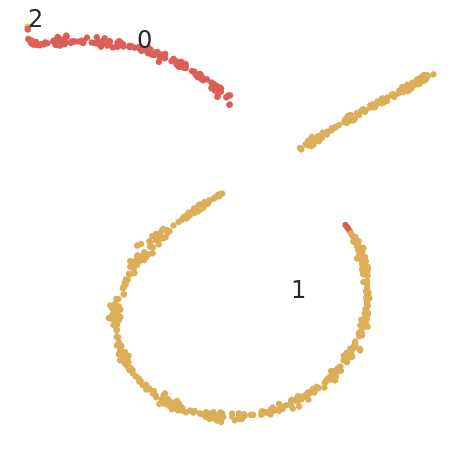

In [27]:
tSNE_function(alternative,3,3)

In [0]:
#### Model dla 

posx and posy should be finite values
posx and posy should be finite values


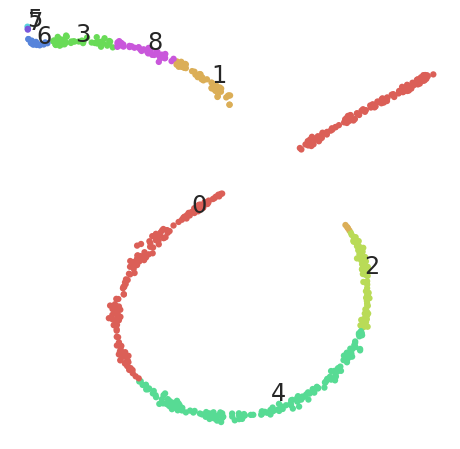

In [28]:
tSNE_function(alternative,9, 3)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


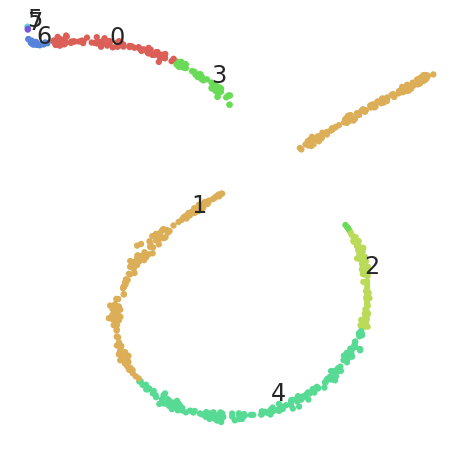

In [29]:
tSNE_function(alternative,8,3)

Wyniki wszystkich modeli nie są jednak zadowalająco dobre. Dlatego też skorzystaliśmy jeszcze z metody Word2Vec.

## Word2Vec

Jest to metoda, która zamienia słowa na wektory. Powstałe w ten sposób wektory były 300 wymiarowe, co znacząco zmniejszyło rozmiar samej ramki.

Ostatecznie wypróbowaliśmy modele na trzech ramkach:
- tylko ramce alternatywnej
- tylko ramce z wektorami słów
- i na połączonych tych dwóch ramkach.

In [31]:
df_vectorized = pd.read_csv("df_vectorized.csv")
df_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.041242,0.077604,0.036364,0.066893,-0.134433,0.029582,0.105818,-0.070187,0.071191,0.063919,...,-0.049042,0.110628,-0.072637,-0.021288,-0.142122,0.033455,0.004740,-0.024418,0.053337,0.038130
1,0.095989,0.048129,0.018197,0.085114,-0.013854,-0.018878,0.037942,-0.105520,0.118251,0.051441,...,-0.107915,0.025351,-0.050142,-0.048873,-0.071528,0.044114,-0.038991,-0.035376,0.023178,0.040613
2,0.053888,0.052255,-0.036298,0.125530,-0.067041,0.002704,0.061221,-0.062382,0.116936,0.064508,...,-0.081647,0.029627,-0.075581,-0.036558,-0.105107,0.084610,-0.032241,0.034148,0.080118,0.013222
3,0.057171,0.047207,0.022806,0.081331,-0.037910,0.020553,0.113764,0.010203,0.149068,0.085489,...,-0.084059,0.033024,-0.108994,-0.014600,-0.099439,-0.013340,-0.013216,-0.025391,0.043503,0.009401
4,-0.010864,-0.008883,-0.057831,0.059721,-0.081299,0.038104,0.046274,-0.041307,0.057204,0.053748,...,-0.139047,0.026931,-0.102929,-0.030264,-0.059224,0.037195,-0.028227,-0.021128,0.002460,0.029109


### Model w przypadku wektorów słów

#### KMeans

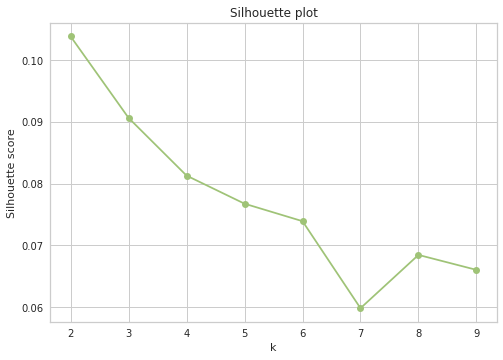

In [32]:
silhouette(df_vectorized, 1)

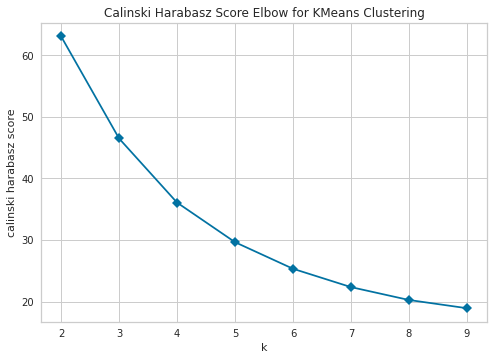

In [33]:
calinski_harabasz(df_vectorized, 1)

Metoda silhouette oraz  Calińskiego-Harabasza wskaxzał, że w tym przypadku optymalną liczbą klastrów będą  2 klastry

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


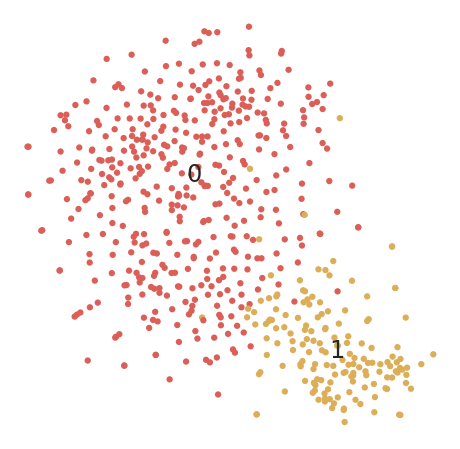

In [34]:
tSNE_function(df_vectorized, 2, 1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


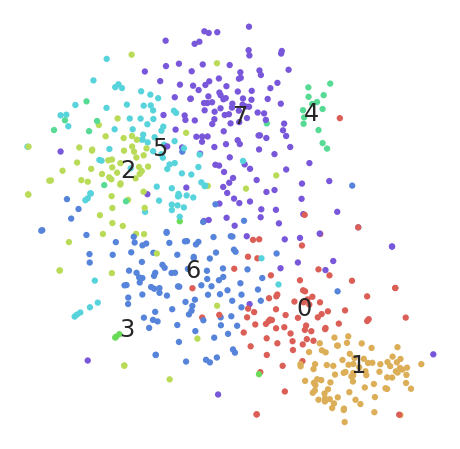

In [35]:
tSNE_function(df_vectorized, 8, 1)

#### AgglomerativeClustering

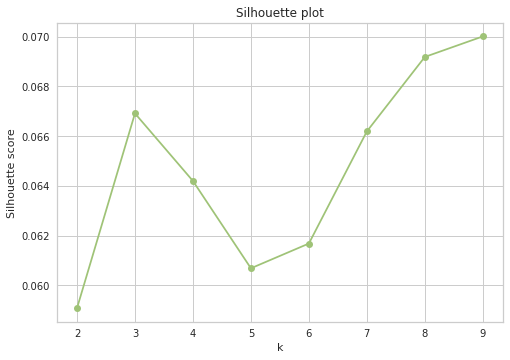

In [36]:
silhouette(df_vectorized, 3)

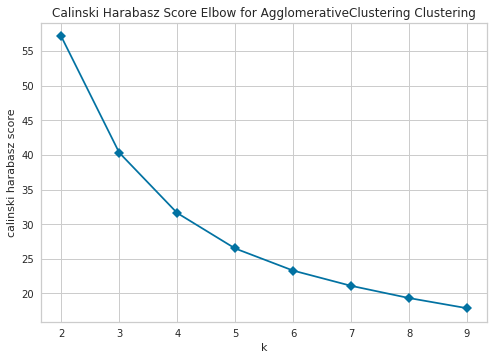

In [37]:
calinski_harabasz(df_vectorized, 3)

Metoda silhouette wskazała, że optymalną liczbą klastrów, w przypadku metody AgglomerativeClustering, będą 3 klastry, natomiast metoda Calińskiego-Harabasza: 2

In [38]:
tSNE_function(df_vectorized, 3, 3)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


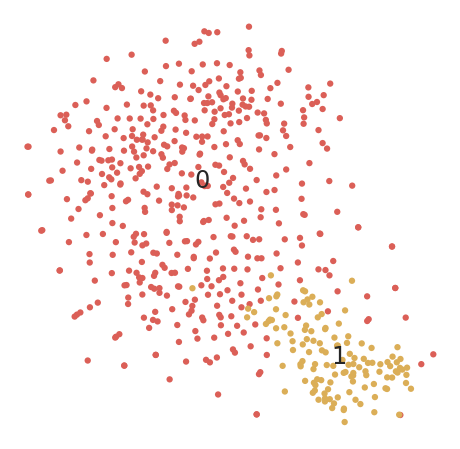

In [39]:
tSNE_function(df_vectorized, 2, 3)

In [40]:
tSNE_function(df_vectorized, 8, 3)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


### Model w przypadku wektora słów + alternatywnej ramki

Stwierdziliśmy, że możemy również spróbować połaczyć obie ramki danych, zawierające nieco odmienne informacje, w celu poprawienia predykcji

In [41]:
df_merged = pd.concat([df_vectorized, alternative.reindex(df_vectorized.index)], axis=1)

#### KMeans

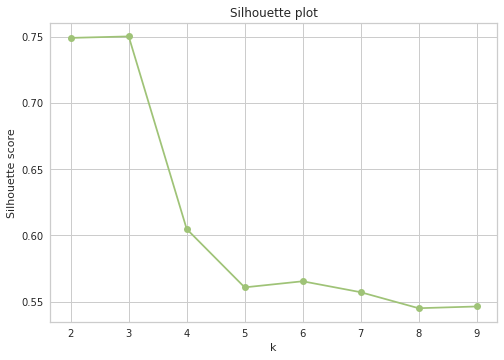

In [42]:
silhouette(df_merged, 1)

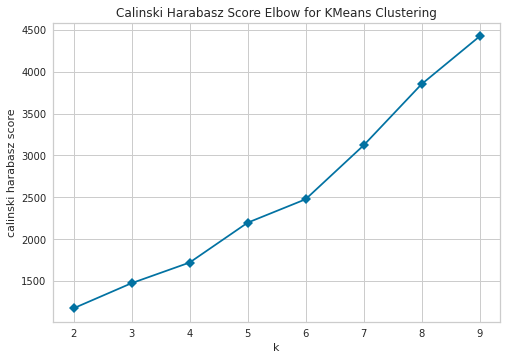

In [43]:
calinski_harabasz(df_merged, 1)

Metoda silhouette wskazała, że optymalną liczbą klastrów, w przypadku metody KMeans, będą 3 klastry, natomiast metoda Calińskiego-Harabasza: 9

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


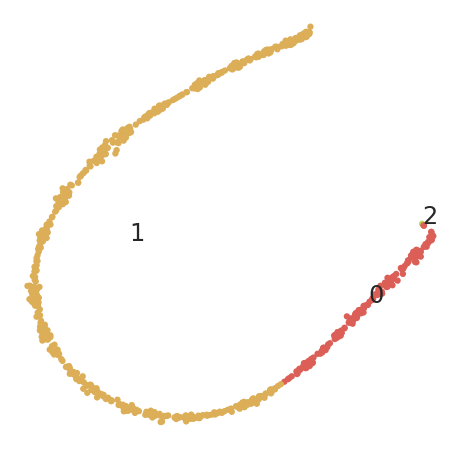

In [44]:
tSNE_function(df_merged, 3, 3)

posx and posy should be finite values
posx and posy should be finite values


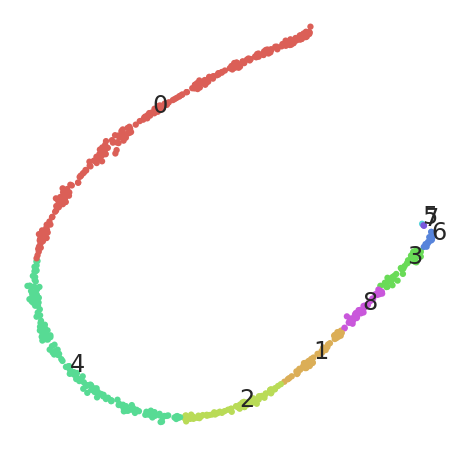

In [45]:
tSNE_function(df_merged,9, 3)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


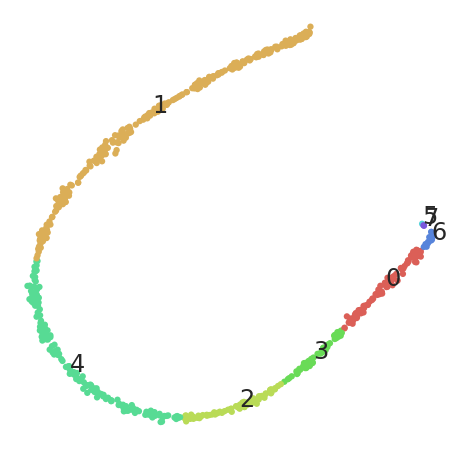

In [46]:
tSNE_function(df_merged, 8, 3)

#### AgglomerativeClustering

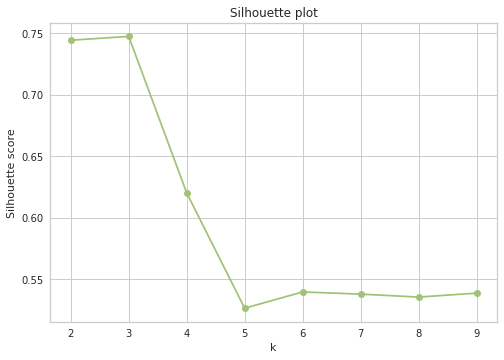

In [47]:
silhouette(df_merged, 3)

In [0]:
calinski_harabasz(df_merged, 3)

Metoda silhouette wskazała, że optymalną liczbą klastrów, w przypadku metody KMeans, będą 3 klastry, natomiast metoda Calińskiego-Harabasza: 9

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


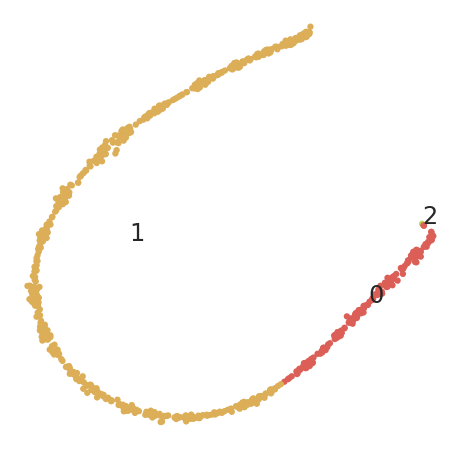

In [53]:
tSNE_function(df_merged, 3, 3)

posx and posy should be finite values
posx and posy should be finite values


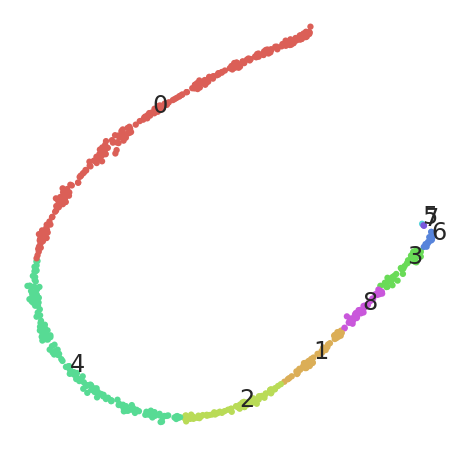

In [52]:
tSNE_function(df_merged, 9, 3)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


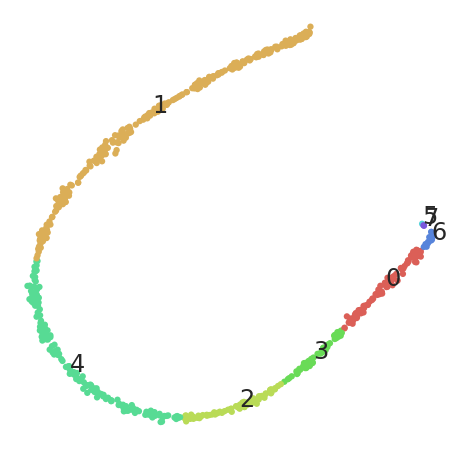

In [51]:
tSNE_function(df_merged, 8, 3)

## Wyniki

### Adjusted Rand Index

Do oceny jakości klasterowania użyliśmy miary ARI. Nasze zadanie wymagało użycia Adjusted Rand Index w zamian za Rand Index, bo o ile liczba klastrów była stała, to liczba elementów w klastrach była zmienna i zależała od modelu i danych. Rand Index jest miarą analogiczną do Accuracy, ale stosowaną w zadaniach klasteryzacji. Wartość 0 miary oznacza całkowicie losowy przydział klastrów, a wartość 1 idealny podział danych na klastry.

Najpierw stworzyliśmy listę poprawnych labelów. W tym celu skorzystaliśmy z drugiej ramki danych (AllBooks_baseline_DTM_Labelled.csv), z której wyekstraktowaliśmmy a następnie odpowiedni zformatowaliśmy kolumnę z etykietami.

![Pierwotna ramka](pierwotna_ramka.png)

![Alternatywna ramka](alternatywna_ramka.png)

![zwektoryzowana ramka](zwektoryzowana_ramka.png)

![Zmergowana ramka](zmergowana_ramka.png)

## Podsumowanie

Podsumowując, korzystając tylko z podstawowej ramki wyniki modeli były bardzo słabe, alternatywna ramka zmniejszyły nam wymiarowość ale wyniki nadal nie były zadowalające. To samo dotyczy metody Word2Vec. Nie udało nam się wytrenować modeli, które miałyby wysoką skuteczność.